In [108]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt

In [109]:
df = pd.read_excel(r'C:\Users\dell\Desktop\pliki\comments_to_post.xlsx', index_col=0)

In [110]:
df

,likes,my_polarity
comment,,
"В Польшу уехали не от хорошей жизни.Я сам убежал,уехал,скрылся-как угодно можно назвать,чтобы не сесть в тюрьму,потому что свобода для меня многое значит...здесь,в Польше,не все беларусы нормальные...многие привезли совок с собой...проблемы остались у всех,но некоторые все равно пытаются свалить их решение на других людей...все люди-разные...",7.0,-1.0
"Здравствуйте, Светлана! Честно говоря, мы до лета прошлого года и сами не знали, какими мы можем быть:)) Мне, как беларуске, кажется, что эта наша общая беда, которая сейчас происходит в Беларуси, нас очень сплотила. Эта ситуация, словно лакмусовая бумажка, показала не только уродливое лицо власти, но дух беларуского народа. Но вы не забывайте, что и у власти в Беларуси, тоже ведь беларусы сидят:( а значит, всё зависит от людей! Сколько живу в Польше, могу сказать, что встречала украинцев с которыми замечательно общалась и которые очень мне помогли. Да и вообще, мне кажется, человек человеку брат и друг, было бы сердце и совесть, и ""национальные особенности"" тут могут не сыграть вообще никакой роли (если такие ""особенности"" вообще существует:)) . А я лично в восторге от вашей инициативы! Спасибо большое!!!",3.0,1.0
"люди разные в разных странах, и не зависит от национальности - просто каждый выбирает свой путь. С удовольствием купила бы у вас орешков, если бы была в варшаве. Не соглашусь, с комментариями выше, что беларусы затоптали бы кого-то, но мимо прошло бы большинство, так как позиция ""мояхатаскраю"" это огромный минус процента 70 беларусов. Поэтому те, кто остается в Беларуси и ушел в подполье, ждут санкций, в надежде что финансовый кризис расшевелит это болото и люди будут вынуждены выйти на забастовку и протест.",3.0,-1.0
"Светлана, ты молодец 👍💪💪",1.0,1.0
Приветствую. Автор высказался субъективно. Я много лет работаю плечом к плечу с украинцами. И не было такого. Чтоб не помогали. Везде есть ложка дегтя на бочку меда.,8.0,0.0
...,...,...
"спасибо вам за написанное! Спасибо что прочитали именно то,что я написала! 🙏",1.0,1.0
"да мне бы знающего человека и разбирающегося в этом... Была бы очень благодарна! Если вы понимаете о чем речь,буду признательна пообщаться в личке!",0.0,1.0
"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы написали и может поймёте что с этим постом не так?",3.0,0.0


In [111]:
df.to_csv(r'C:\Users\dell\Desktop\pliki\comments_to_post.csv')


In [112]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\comments_to_post.csv')
df

,comment,likes,my_polarity
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0
3,"Светлана, ты молодец 👍💪💪",1.0,1.0
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0
...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0


In [113]:
del df["my_polarity"]

In [114]:
df

,comment,likes
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0
2,"люди разные в разных странах, и не зависит от ...",3.0
3,"Светлана, ты молодец 👍💪💪",1.0
4,Приветствую. Автор высказался субъективно. Я м...,8.0
...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0
82,да мне бы знающего человека и разбирающегося в...,0.0
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0
84,"я видела их посты,я читала о чем пишут люди! В...",9.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  86 non-null     object 
 1   likes    86 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [116]:
#Sentiment prediction

In [117]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [118]:
list_of_posts = df['comment'].tolist()

In [119]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
sentiment_list = []
results = model.predict(list_of_posts, k=2)
for sentiment in results:
    sentiment_list.append(sentiment)

In [120]:
neutral_list = []
negative_list = []
positive_list = []
speech_list = []
skip_list = []
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))

In [121]:
df['neutral'] = neutral_list
df['negative'] = negative_list
df['positive'] = positive_list

In [122]:
#0.5
THRESHOLD = 0.4

conditions = [
    (df['negative'] >= THRESHOLD),
    (df['neutral'] >= THRESHOLD ) & (df['neutral'] <= THRESHOLD),
    (df['positive'] >= THRESHOLD)
     ]

values = ["neg", "neu", "pos"]
df['dost_pred'] = np.select(conditions, values)

df.head()
#& (df['positive'] <= THRESHOLD),
# Add the column for summarising the polarity
def getAnalysis(THRESHOLD):
    if THRESHOLD < 0.5:
        return 'Negative'
    elif THRESHOLD == 0.5:
        return 'Neutral'
    else:
        return 'Positive'
    


In [123]:
df['dost_pred'] = df['dost_pred'].replace('0', 'neu', regex=True)

In [124]:
df

,comment,likes,neutral,negative,positive,dost_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,0.334599,0.531219,0.000000,neg
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,0.000000,0.239359,0.256842,neu
2,"люди разные в разных странах, и не зависит от ...",3.0,0.615098,0.201823,0.000000,neu
3,"Светлана, ты молодец 👍💪💪",1.0,0.040856,0.000000,0.964865,pos
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.437833,0.300756,0.000000,neu
...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,0.000000,0.000000,0.000000,neu
82,да мне бы знающего человека и разбирающегося в...,0.0,0.334599,0.129413,0.000000,neu
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.962683,0.078088,0.000000,neu
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,0.384922,0.437833,0.000000,neg


In [125]:
df[df.negative > 0.57]

,comment,likes,neutral,negative,positive,dost_pred
16,ЭТОТ ПОСТ НАПИСАН НЕ О НАЦИОНАЛИЗМЕ\n НЕ ПРОТИ...,15.0,0.256842,0.577505,0.0,neg
27,Слезьте с украинцев много чего было в 2014 Вы ...,6.0,0.348655,0.607673,0.0,neg
64,Санкции нас действительно толкают в лапы Росси...,0.0,0.156115,0.737168,0.0,neg
67,может быть и так((( Не могу судить и не могу г...,0.0,0.217348,0.600198,0.0,neg
72,"и да, среди тех, кто остался, тоже есть герои,...",2.0,0.275140,0.615098,0.0,neg


In [126]:
df[df.positive > 0.44]

,comment,likes,neutral,negative,positive,dost_pred
3,"Светлана, ты молодец 👍💪💪",1.0,0.040856,0.000000,0.964865,pos
21,"Что ты несёшь, украинцы - прекрасный народ",0.0,0.000000,0.000000,0.629785,pos
41,Держитесь! Молюсь о Вас!,0.0,0.173298,0.000000,0.679189,pos
60,"действительно, в любой нации есть как хорошие ...",1.0,0.201823,0.000000,0.718604,pos
69,"воооооот, наконец-то!!!!!!\n Спасибо вам!!!!\n...",3.0,0.000000,0.327678,0.453272,pos


In [127]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = [
    'Завтраки в этом отеле выше всяких похвал',
    'Связь в этом районе очень плохая',
]

results = model.predict(messages, k = 2)

for message, sentiment in zip(messages, results):
    print(message, '->', sentiment)

Завтраки в этом отеле выше всяких похвал -> {'negative': 0.30736804008483887, 'skip': 0.22816647589206696}
Связь в этом районе очень плохая -> {'negative': 0.3702353835105896, 'neutral': 0.2814156115055084}


In [128]:
df['comment']

0     В Польшу уехали не от хорошей жизни.Я сам убеж...
1     Здравствуйте, Светлана! Честно говоря, мы до л...
2     люди разные в разных странах, и не зависит от ...
3                              Светлана, ты молодец 👍💪💪
4     Приветствую. Автор высказался субъективно. Я м...
                            ...                        
81    спасибо вам за написанное! Спасибо что прочита...
82    да мне бы знающего человека и разбирающегося в...
83    Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...
84    я видела их посты,я читала о чем пишут люди! В...
85    не бери близко к сердцу... Люди разные.. Подсо...
Name: comment, Length: 86, dtype: object

In [129]:
results = model.predict(df['comment'], k=2)

In [130]:
results

[{'negative': 0.5312193632125854, 'neutral': 0.33459946513175964},
 {'positive': 0.2568419873714447, 'negative': 0.23935934901237488},
 {'neutral': 0.6150978803634644, 'negative': 0.20182321965694427},
 {'positive': 0.9648651480674744, 'neutral': 0.040855713188648224},
 {'neutral': 0.4378334879875183, 'negative': 0.3007555902004242},
 {'negative': 0.41490885615348816, 'skip': 0.22271016240119934},
 {'skip': 0.2689514458179474, 'positive': 0.21207880973815918},
 {'negative': 0.1824355274438858, 'speech': 0.1259327530860901},
 {'negative': 0.3629792034626007, 'neutral': 0.320831298828125},
 {'neutral': 0.348655104637146, 'negative': 0.23371636867523193},
 {'neutral': 0.3140605390071869, 'negative': 0.2814156115055084},
 {'negative': 0.287777841091156, 'positive': 0.2509227991104126},
 {'neutral': 0.3557848632335663, 'negative': 0.16027602553367615},
 {'negative': 0.44553956389427185, 'neutral': 0.3629792034626007},
 {'speech': 0.1732981950044632, 'neutral': 0.16027602553367615},
 {'neutr

In [131]:
df = pd.read_csv(r'C:\Users\dell\Desktop\pliki\comments_to_post.csv')
df

,comment,likes,my_polarity
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0
3,"Светлана, ты молодец 👍💪💪",1.0,1.0
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0
...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0


In [132]:
list_of_posts = df['comment'].tolist()

In [133]:
list_of_posts

['В Польшу уехали не от хорошей жизни.Я сам убежал,уехал,скрылся-как угодно можно назвать,чтобы не сесть в тюрьму,потому что свобода для меня многое значит...здесь,в Польше,не все беларусы нормальные...многие привезли совок с собой...проблемы остались у всех,но некоторые все равно пытаются свалить их решение на других людей...все люди-разные...',
 'Здравствуйте, Светлана! Честно говоря, мы до лета прошлого года и сами не знали, какими мы можем быть:)) Мне, как беларуске, кажется, что эта наша общая беда, которая сейчас происходит в Беларуси, нас очень сплотила. Эта ситуация, словно лакмусовая бумажка, показала не только уродливое лицо власти, но дух беларуского народа. Но вы не забывайте, что и у власти в Беларуси, тоже ведь беларусы сидят:( а значит, всё зависит от людей! Сколько живу в Польше, могу сказать, что встречала украинцев с которыми замечательно общалась и которые очень мне помогли. Да и вообще, мне кажется, человек человеку брат и друг, было бы сердце и совесть, и "национал

In [134]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
sentiment_list = []
results = model.predict(list_of_posts, k=2)
for sentiment in results:
    sentiment_list.append(sentiment)

In [135]:
neutral_list = []
negative_list = []
positive_list = []
speech_list = []
skip_list = []
for sentiment in sentiment_list:
    neutral = sentiment.get('neutral')
    negative = sentiment.get('negative')
    positive = sentiment.get('positive')
    speech = sentiment.get('speech')
    skip = sentiment.get('skip')
    if neutral is None:
        neutral_list.append(0)
    else:
        neutral_list.append(sentiment.get('neutral'))
    if negative is None:
        negative_list.append(0)
    else:
        negative_list.append(sentiment.get('negative'))
    if positive is None:
        positive_list.append(0)
    else:
        positive_list.append(sentiment.get('positive'))
    if speech is None:
        speech_list.append(0)
    else:
        speech_list.append(sentiment.get('speech'))
    if skip is None:
        skip_list.append(0)
    else:
        skip_list.append(sentiment.get('skip'))

In [136]:
df['neutral'] = neutral_list
df['negative'] = negative_list
df['positive'] = positive_list
df['speech'] = speech_list
df['skip'] = skip_list

In [137]:
df

,comment,likes,my_polarity,neutral,negative,positive,speech,skip
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,0.334599,0.531219,0.000000,0.000000,0.000000
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,0.000000,0.239359,0.256842,0.000000,0.000000
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,0.615098,0.201823,0.000000,0.000000,0.000000
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,0.040856,0.000000,0.964865,0.000000,0.000000
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,0.437833,0.300756,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,0.000000,0.000000,0.000000,0.863402,0.040856
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,0.334599,0.129413,0.000000,0.000000,0.000000
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,0.962683,0.078088,0.000000,0.000000,0.000000
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,0.384922,0.437833,0.000000,0.000000,0.000000


In [138]:
#del df["my_polarity"]

In [139]:
df

,comment,likes,my_polarity,neutral,negative,positive,speech,skip
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,0.334599,0.531219,0.000000,0.000000,0.000000
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,0.000000,0.239359,0.256842,0.000000,0.000000
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,0.615098,0.201823,0.000000,0.000000,0.000000
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,0.040856,0.000000,0.964865,0.000000,0.000000
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,0.437833,0.300756,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,0.000000,0.000000,0.000000,0.863402,0.040856
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,0.334599,0.129413,0.000000,0.000000,0.000000
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,0.962683,0.078088,0.000000,0.000000,0.000000
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,0.384922,0.437833,0.000000,0.000000,0.000000


In [140]:
df.loc[df['skip'] >= 0.1]

,comment,likes,my_polarity,neutral,negative,positive,speech,skip
5,Не надо о украинцах плохо думать. Прекрасный н...,31.0,1.0,0.000000,0.414909,0.000000,0.0,0.222710
6,"Вы запутались, женщина)) Среди жителей украины...",0.0,0.0,0.000000,0.000000,0.212079,0.0,0.268951
15,"@Svitlana Milewska а что вас так напугало, что...",6.0,-1.0,0.644235,0.000000,0.000000,0.0,0.119213
19,"Как говорится , в семье не без урода, везде хв...",5.0,-1.0,0.000000,0.492198,0.000000,0.0,0.206904
21,"Что ты несёшь, украинцы - прекрасный народ",0.0,1.0,0.000000,0.000000,0.629785,0.0,0.327678
22,"А слабо похвалить один народ, не опуская при э...",11.0,0.0,0.407343,0.000000,0.000000,0.0,0.651365
57,"я против политики была,есть и буду!!!!\n Мы,мо...",1.0,0.0,0.000000,0.287778,0.000000,0.0,0.239359
62,",приезжайте в гости,все будет! 🤗\n Про посты,п...",1.0,1.0,0.531219,0.000000,0.000000,0.0,0.140346
73,"а ведь они реально хотели вас поддержать, как ...",1.0,1.0,0.348655,0.000000,0.000000,0.0,0.173298
80,"Сплочённые, но доверчивые. Этим пользуются наш...",0.0,-1.0,0.000000,0.355785,0.000000,0.0,0.245095


In [141]:
#0.5
THRESHOLD = 0.4

conditions = [
    (df['negative'] >= THRESHOLD),
    (df['neutral'] >= THRESHOLD ) & (df['neutral'] <= THRESHOLD),
    (df['positive'] >= THRESHOLD)
     ]

values = ["neg", "neu", "pos"]
df['dost_pred'] = np.select(conditions, values)

df.head()
#& (df['positive'] <= THRESHOLD),
# Add the column for summarising the polarity
def getAnalysis(THRESHOLD):
    if THRESHOLD < 0.5:
        return 'Negative'
    elif THRESHOLD == 0.5:
        return 'Neutral'
    else:
        return 'Positive'
    

In [142]:
df['dost_pred'] = df['dost_pred'].replace('0', 'neu', regex=True)

In [143]:
df

,comment,likes,my_polarity,neutral,negative,positive,speech,skip,dost_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,0.334599,0.531219,0.000000,0.000000,0.000000,neg
1,"Здравствуйте, Светлана! Честно говоря, мы до л...",3.0,1.0,0.000000,0.239359,0.256842,0.000000,0.000000,neu
2,"люди разные в разных странах, и не зависит от ...",3.0,-1.0,0.615098,0.201823,0.000000,0.000000,0.000000,neu
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,0.040856,0.000000,0.964865,0.000000,0.000000,pos
4,Приветствую. Автор высказался субъективно. Я м...,8.0,0.0,0.437833,0.300756,0.000000,0.000000,0.000000,neu
...,...,...,...,...,...,...,...,...,...
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,0.000000,0.000000,0.000000,0.863402,0.040856,neu
82,да мне бы знающего человека и разбирающегося в...,0.0,1.0,0.334599,0.129413,0.000000,0.000000,0.000000,neu
83,"Ну, так перечитайте внимательно ЧТО ИМЕННО Вы ...",3.0,0.0,0.962683,0.078088,0.000000,0.000000,0.000000,neu
84,"я видела их посты,я читала о чем пишут люди! В...",9.0,1.0,0.384922,0.437833,0.000000,0.000000,0.000000,neg


In [144]:
df.loc[df['skip'] >= 0.1]

,comment,likes,my_polarity,neutral,negative,positive,speech,skip,dost_pred
5,Не надо о украинцах плохо думать. Прекрасный н...,31.0,1.0,0.000000,0.414909,0.000000,0.0,0.222710,neg
6,"Вы запутались, женщина)) Среди жителей украины...",0.0,0.0,0.000000,0.000000,0.212079,0.0,0.268951,neu
15,"@Svitlana Milewska а что вас так напугало, что...",6.0,-1.0,0.644235,0.000000,0.000000,0.0,0.119213,neu
19,"Как говорится , в семье не без урода, везде хв...",5.0,-1.0,0.000000,0.492198,0.000000,0.0,0.206904,neg
21,"Что ты несёшь, украинцы - прекрасный народ",0.0,1.0,0.000000,0.000000,0.629785,0.0,0.327678,pos
22,"А слабо похвалить один народ, не опуская при э...",11.0,0.0,0.407343,0.000000,0.000000,0.0,0.651365,neu
57,"я против политики была,есть и буду!!!!\n Мы,мо...",1.0,0.0,0.000000,0.287778,0.000000,0.0,0.239359,neu
62,",приезжайте в гости,все будет! 🤗\n Про посты,п...",1.0,1.0,0.531219,0.000000,0.000000,0.0,0.140346,neu
73,"а ведь они реально хотели вас поддержать, как ...",1.0,1.0,0.348655,0.000000,0.000000,0.0,0.173298,neu
80,"Сплочённые, но доверчивые. Этим пользуются наш...",0.0,-1.0,0.000000,0.355785,0.000000,0.0,0.245095,neu


In [145]:
df.loc[df['speech'] >= 0.1]

,comment,likes,my_polarity,neutral,negative,positive,speech,skip,dost_pred
7,Спасибо за такие слова. Среди наших тоже есть ...,0.0,1.0,0.000000,0.182436,0.0,0.125933,0.000000,neu
14,Спасибо Вам за Ваше мнение! И за отношение к б...,5.0,1.0,0.160276,0.000000,0.0,0.173298,0.000000,neu
33,Спасибо вам за вашу поддержку,3.0,1.0,0.000000,0.000000,0.0,0.993317,0.027595,neu
81,спасибо вам за написанное! Спасибо что прочита...,1.0,1.0,0.000000,0.000000,0.0,0.863402,0.040856,neu


C:\Users\dell\AppData\Local\Temp/ipykernel_17320/1929052262.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])


Text(0.5, 1.0, "Sentiment of 'comments prediction by dostoevsky")

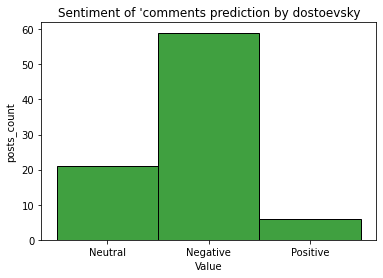

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['dost_pred'].value_counts()

ax = sns.histplot(df['dost_pred'], color = 'green')
#ax.set_style('darkgrid')
ax.set_xlabel("Value")
ax.set_ylabel("posts_count")

ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])
ax.set_title("Sentiment of 'comments prediction by dostoevsky") 

In [148]:
df['positive'].sum()

6.352562014013529

In [149]:
df['neutral'].sum()

31.26971984654665

In [150]:
df['negative'].sum()

21.12202489376068

In [151]:
labeled_dostoevsky = df


In [152]:
labeled_dostoevsky.to_csv('C:/Users/dell/Desktop/pliki/labeled_dostoevsky.csv', encoding = 'utf-8',  index = False)

In [153]:
df[df.dost_pred == 'neg']

,comment,likes,my_polarity,neutral,negative,positive,speech,skip,dost_pred
0,В Польшу уехали не от хорошей жизни.Я сам убеж...,7.0,-1.0,0.334599,0.531219,0.0,0.0,0.000000,neg
5,Не надо о украинцах плохо думать. Прекрасный н...,31.0,1.0,0.000000,0.414909,0.0,0.0,0.222710,neg
13,"Если бы Белорусы были такие сплочённый, как вы...",6.0,-1.0,0.362979,0.445540,0.0,0.0,0.000000,neg
16,ЭТОТ ПОСТ НАПИСАН НЕ О НАЦИОНАЛИЗМЕ\n НЕ ПРОТИ...,15.0,-1.0,0.256842,0.577505,0.0,0.0,0.000000,neg
17,Каждый судит по себе...не думаю что вы имеете ...,8.0,-1.0,0.191943,0.562187,0.0,0.0,0.000000,neg
19,"Как говорится , в семье не без урода, везде хв...",5.0,-1.0,0.000000,0.492198,0.0,0.0,0.206904,neg
24,Нет плохих национальностей - есть плохие люди…...,6.0,0.0,0.585111,0.461027,0.0,0.0,0.000000,neg
26,Я наоборот восхищаюсь украинской общиной в Пол...,12.0,1.0,0.177821,0.414909,0.0,0.0,0.000000,neg
27,Слезьте с украинцев много чего было в 2014 Вы ...,6.0,0.0,0.348655,0.607673,0.0,0.0,0.000000,neg
36,именно. Такую реакцию вызывает Ваш пост как ми...,3.0,-1.0,0.523430,0.430157,0.0,0.0,0.000000,neg


In [154]:
df[df.dost_pred == 'pos']

,comment,likes,my_polarity,neutral,negative,positive,speech,skip,dost_pred
3,"Светлана, ты молодец 👍💪💪",1.0,1.0,0.040856,0.000000,0.964865,0.0,0.000000,pos
21,"Что ты несёшь, украинцы - прекрасный народ",0.0,1.0,0.000000,0.000000,0.629785,0.0,0.327678,pos
41,Держитесь! Молюсь о Вас!,0.0,1.0,0.173298,0.000000,0.679189,0.0,0.000000,pos
58,"да, с соседями надо жить дружно. Видела ниже в...",1.0,1.0,0.144159,0.000000,0.437833,0.0,0.000000,pos
60,"действительно, в любой нации есть как хорошие ...",1.0,1.0,0.201823,0.000000,0.718604,0.0,0.000000,pos
69,"воооооот, наконец-то!!!!!!\n Спасибо вам!!!!\n...",3.0,1.0,0.000000,0.327678,0.453272,0.0,0.000000,pos


In [155]:
#df = labeled_dostoevsky_hypoteza

In [156]:
#labeled_dostoevsky_hypoteza.to_csv('C:/Users/dell/Desktop/pliki/labeled_dostoevsky.csv', encoding = 'utf-8',  index = False)